# Using Pandas time series functions.

## pd.date_range()


In [2]:
import pandas as pd

Basic usage of date_range function on the pandas library. The best time series description in pandas was [this  one](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html) from [Python DataScience Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html), from Jake VanderPlas, and the official documentations is [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#).

In [3]:
times = pd.date_range(start='2020-01-01T00:00',periods=10,freq='MS')
times

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [4]:
times = pd.date_range(start='2020-01-01T00:00',end='2020-10-01T00:00',freq='MS')
times

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [5]:
times = pd.date_range(start='2020-01-01T00:00',end='2020-02-01T00:00',freq='D')
times

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01'],
              dtype='datetime64[ns]', freq='D')

In [6]:
times = pd.date_range(start='2020-01-01T00:00',end='2020-02-01T00:00',freq='2D')
times

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-05', '2020-01-07',
               '2020-01-09', '2020-01-11', '2020-01-13', '2020-01-15',
               '2020-01-17', '2020-01-19', '2020-01-21', '2020-01-23',
               '2020-01-25', '2020-01-27', '2020-01-29', '2020-01-31'],
              dtype='datetime64[ns]', freq='2D')

Frequencies are described using offset aliases, which are described in the table below, taken from the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases).

Many combinations are possible, including playing with days of the week and inventing new offset. The most common combination should be multiplying a time off by a number, `freq='D'` $\rightarrow$ `freq='5D'`, which will set frequencies to five days!

Take a look on the references given here for more information, if needed.

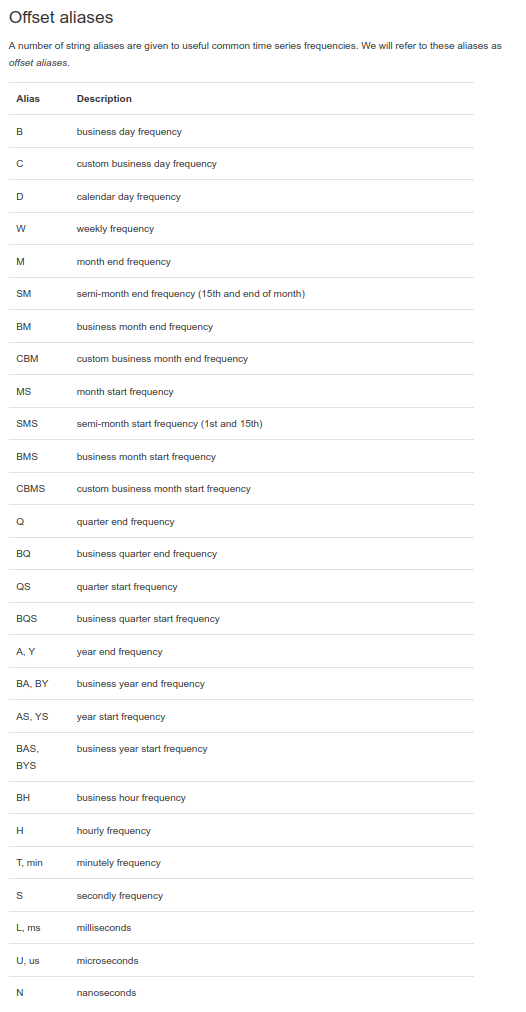

Working with periods

In [44]:
pd.date_range(start='2020-01-01',end='2020-12-01',periods=10)

DatetimeIndex(['2020-01-01 00:00:00', '2020-02-07 05:20:00',
               '2020-03-15 10:40:00', '2020-04-21 16:00:00',
               '2020-05-28 21:20:00', '2020-07-05 02:40:00',
               '2020-08-11 08:00:00', '2020-09-17 13:20:00',
               '2020-10-24 18:40:00', '2020-12-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

## pd.to_datetime()
It is also possible to send a list of dates to the `DatetimeIndex` format using the `pd.to_datetime()` function, which will return either a `DatetimeIndex` (many elements) or a `Timestamp` (single element) object.

In [7]:
dates = pd.to_datetime(['Sep 07th 2000', '09/07/2000', 'September/07/2000', pd.NaT, 'blablabla'],errors='coerce')
single_date = pd.to_datetime('Sep 07th 2000')
dates, single_date

(DatetimeIndex(['2000-09-07', '2000-09-07', '2000-09-07', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None),
 Timestamp('2000-09-07 00:00:00'))

Note that we used `pd.NaT`, which is a Pandas type indicating *Not a Time*, but that should be used in conjunction with the option `errors='coerce'`.

## Working with deltas

In [12]:
birth = pd.to_datetime('1992-07-31T08:30')
today = pd.to_datetime('today')

In [62]:
delta = (today - birth)/10

In [63]:
delta

Timedelta('1064 days 00:41:08.021664992')

In [64]:
delta.components

Components(days=1064, hours=0, minutes=41, seconds=8, milliseconds=21, microseconds=664, nanoseconds=992)

In [65]:
delta.components.minutes

41

In [73]:
delta.floor('min')

Timedelta('1064 days 00:41:00')

In [75]:
delta.resolution_string

'N'